$$   \left\{\begin{matrix}(y'')^{2} +e^{y'} -\frac{e}{lnx}y^{2} =\frac{1}{x^{2}}
\\ y(e)=e, y(e^{2})=2e^{2}
\\ {y}'(e)=\alpha 
\end{matrix}\right.     $$

$$  Y = \binom{y}{{y'}} \Rightarrow  {Y}' =\binom{{y}'}{{{y}''}}=F(x,Y) = \binom{Y[1]}{\sqrt{\frac{1}{x^{2}}+ \frac{e}{lnx}Y[0]^{2} - Y[0]e^{Y[1]}}}
 $$

In [149]:
import numpy as np
import matplotlib.pyplot as plt

e = np.exp(1)
def F(x,Y):
    return np.array([Y[1], np.sqrt((1/x**2) + e*(Y[0]**2)/np.log(x) - np.exp(Y[1])*Y[0])])

#ф-я использует 4-стадийный метод РК, n - число узлов
def function(x_left, y_left, x_right, y_right, alpha, n):
    x = np.linspace(x_left, x_right, n)
    length = len(x)
    h = x[1] - x[0]
    Y = np.zeros((2, length))
    Y[0][0] = y_left
    Y[1][0] = alpha

    k = np.zeros((4, len(Y)))
    for n in range(1,length):
        k[0] = F(x[n-1], Y.T[n-1])
        k[1] = F(x[n-1] + h/2, Y.T[n-1] + h/2 * k[0])
        k[2] = F(x[n-1] + h/2, Y.T[n-1] + h/2 * k[1])
        k[3] = F(x[n-1] + h, Y.T[n-1] + h * k[2])     
        Y.T[n] = Y.T[n-1] + h/6 * (k[0] + 2*k[1] + 2*k[2] + k[3])
    return Y #Y[0][n]

#def alpha(n,epsilon):
#    for alpha in np.arange(1.8, 1.9, 0.01):
#        if np.abs(function(e, e, e*e, 2*e*e, 1, 100)[n-1] - 2) < epsilon:
#            return alpha       

<ipython-input-149-43656377f607>:6: RuntimeWarning: invalid value encountered in sqrt
  return np.array([Y[1], np.sqrt((1/x**2) + e*(Y[0]**2)/np.log(x) - np.exp(Y[1])*Y[0])])


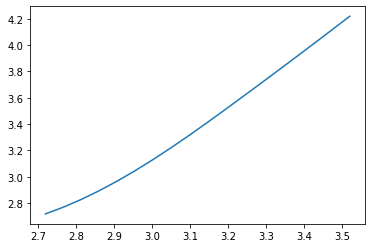

In [150]:
y = function(e, e, e*e, 2*e*e, 1, 100)[0]
x = np.linspace(e, e*e, 100)
plt.plot(x,y)
#plt.axis([0,3.5,0,4.2])

In [151]:
import pandas as ps
x = x = np.linspace(e, e*e, 100)
y = function(e, e, e*e, 2*e*e, 0, 100)[0]
array = np.zeros((2,5))
array[0] = np.linspace(0.5,2.5,5)
array[1] = np.interp(array[0], x, y)
table = ps.DataFrame(data=array, index=np.arange(0,2), columns=np.arange(0,5))
table.index = ['x','y']
table

<ipython-input-149-43656377f607>:6: RuntimeWarning: invalid value encountered in sqrt
  return np.array([Y[1], np.sqrt((1/x**2) + e*(Y[0]**2)/np.log(x) - np.exp(Y[1])*Y[0])])


,0,1,2,3,4
x,0.500000,1.000000,1.500000,2.000000,2.500000
y,2.718282,2.718282,2.718282,2.718282,2.718282


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

e = np.exp(1)

def F(x,Y):
    return np.array([Y[1], np.sqrt(1/x**2 + e*(Y[0])**2/np.log(x) - np.exp(Y[1])*Y[0])])  

#ф-я, используя метод Принса-Дорманда,  возвращает y, n - число узлов
def function(x_left, y_left, x_right, y_right, alpha, n):
    x = np.linspace(x_left, x_right, n)
    length = len(x)
    h = x[1] - x[0]
    Y = np.zeros((2, length))
    Y[0][0] = y_left
    Y[1][0] = alpha

    k = np.zeros((7, len(Y)))
    for n in range(1,length):
        k[0] = F(x[n-1], Y.T[n-1])
        k[1] = F(x[n-1] + h/5, Y.T[n-1] + h/5 * k[0])
        k[2] = F(x[n-1] + 3*h/10, Y.T[n-1] + h*3/40 * k[0] + h*9/40 * k[1])
        k[3] = F(x[n-1] + 4*h/5, Y.T[n-1] + 44*h/55 * k[0] - 56*h/15 * k[1] + 32*h/9 * k[2])
        k[4] = F(x[n-1] + 8*h/9, Y.T[n-1] + 19372*h/6561 * k[0] - 25360*h/2187 * k[1] + 64448*h/6561 * k[2] - 212*h/729 * k[3])
        k[5] = F(x[n-1] + h, Y.T[n-1] + 9017*h/3168 * k[0] - 355*h/33 * k[1] + 46732*h/5247 * k[2] +49*h/176 * k[3] - 5103*h/18656 * k[4])
        k[6] = F(x[n-1] + h, Y.T[n-1] + 35*h/384 * k[0] + 500*h/1113 * k[2] + 125*h/192 * k[3] - 2187*h/6784 * k[4] + 11*h/84 * k[5])
        Y.T[n] = h*(35/384*k[0] + 500/1113*k[2] + 125/192*k[3] -2187/6784*k[4] + 11/84*k[5])
    return Y